In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%matplotlib inline
%cd pandas_data/

D:\CMSC6950\CMSC6950-2017\lectures\pandas_data


In [2]:
!head -n15 nvt_berendsen.gro

Chloroethane
 8000
    1LIG      C    1   1.767   1.718   4.553 -0.3691  0.0876  0.2868
    1LIG      H    2   1.874   1.726   4.572  0.2073 -0.9631 -2.1583
    1LIG      H    3   1.731   1.817   4.580 -0.7323  0.1380 -0.3705
    1LIG      H    4   1.728   1.643   4.623 -2.0876  0.3128 -0.4014
    1LIG      C    5   1.734   1.699   4.405 -0.0319 -0.8964  0.3304
    1LIG      H    6   1.777   1.606   4.367 -0.4904 -0.2839 -1.7862
    1LIG      H    7   1.775   1.783   4.349 -2.4901  0.9136  1.0744
    1LIG     CL    8   1.557   1.698   4.385  0.0449 -0.2186 -0.4189
    2LIG      C    9   2.280   0.416   3.435 -0.3748 -0.2371  0.2111
    2LIG      H   10   2.376   0.465   3.453  0.6476 -1.9921 -0.1844
    2LIG      H   11   2.221   0.430   3.525  0.0786 -0.6578  0.5836
    2LIG      H   12   2.309   0.311   3.437 -3.1216 -1.0492  2.4335
    2LIG      C   13   2.222   0.461   3.301 -0.8851  0.5726  0.6990


In [3]:
!tail -n5 nvt_berendsen.gro

 1000LIG      C 7997   0.152   2.024   2.110  0.3288  0.4162 -0.2861
 1000LIG      H 7998   0.081   1.954   2.155  0.7683 -1.1081 -1.8281
 1000LIG      H 7999   0.141   2.021   2.002 -0.6068  3.3358 -0.3694
 1000LIG     CL 8000   0.089   2.180   2.168  0.0204  0.2227 -0.0991
   4.92200   4.92200   4.92200


In [4]:
gro_header=['res_id', 'elem', 'atomno', 'x', 'y', 'z', 'vx', 'vy', 'vz']

df = pd.read_table('nvt_berendsen.gro', sep='\s+', skiprows=2, names=gro_header)

df.iloc[-1]=np.NaN
df.dropna(inplace=True)
df.tail()

,res_id,elem,atomno,x,y,z,vx,vy,vz
7995,1000LIG,H,7996.0,0.360,2.076,2.128,0.3706,-0.2737,-1.3683
7996,1000LIG,C,7997.0,0.152,2.024,2.110,0.3288,0.4162,-0.2861
7997,1000LIG,H,7998.0,0.081,1.954,2.155,0.7683,-1.1081,-1.8281
7998,1000LIG,H,7999.0,0.141,2.021,2.002,-0.6068,3.3358,-0.3694
7999,1000LIG,CL,8000.0,0.089,2.180,2.168,0.0204,0.2227,-0.0991


In [5]:
df.head()

,res_id,elem,atomno,x,y,z,vx,vy,vz
0,1LIG,C,1.0,1.767,1.718,4.553,-0.3691,0.0876,0.2868
1,1LIG,H,2.0,1.874,1.726,4.572,0.2073,-0.9631,-2.1583
2,1LIG,H,3.0,1.731,1.817,4.580,-0.7323,0.1380,-0.3705
3,1LIG,H,4.0,1.728,1.643,4.623,-2.0876,0.3128,-0.4014
4,1LIG,C,5.0,1.734,1.699,4.405,-0.0319,-0.8964,0.3304


In [6]:
df['vel'] = (df.vx **2 + df.vy **2 + df.vz **2) **0.5

In [7]:
df.head()

,res_id,elem,atomno,x,y,z,vx,vy,vz,vel
0,1LIG,C,1.0,1.767,1.718,4.553,-0.3691,0.0876,0.2868,0.475566
1,1LIG,H,2.0,1.874,1.726,4.572,0.2073,-0.9631,-2.1583,2.372508
2,1LIG,H,3.0,1.731,1.817,4.580,-0.7323,0.1380,-0.3705,0.832212
3,1LIG,H,4.0,1.728,1.643,4.623,-2.0876,0.3128,-0.4014,2.148730
4,1LIG,C,5.0,1.734,1.699,4.405,-0.0319,-0.8964,0.3304,0.955884


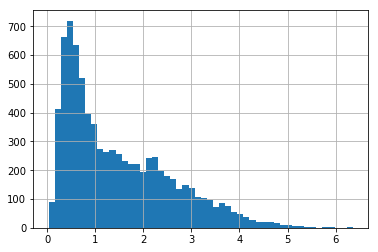

In [8]:
df['vel'].hist(bins=50)

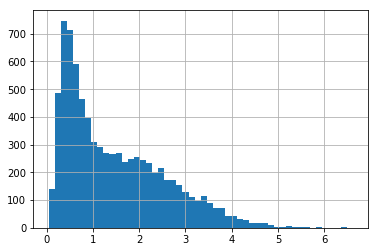

In [9]:
df_bussi = pd.read_table('nvt_bussi.gro', sep='\s+', skiprows=2, names=gro_header)
df_bussi['vel'] = (df_bussi.vx **2 + df_bussi.vy **2 + df_bussi.vz **2) **0.5
df_bussi['vel'].hist(bins=50)

In [10]:
df.describe()

,atomno,x,y,z,vx,vy,vz,vel
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,2.463283,2.438690,2.454125,-0.012186,-0.004563,0.029142,1.467645
std,2309.54541,1.424087,1.413223,1.424752,1.054439,1.059265,1.064502,1.101733
min,1.00000,-0.204000,-0.233000,-0.224000,-5.189200,-4.971500,-5.588700,0.026528
25%,2000.75000,1.225750,1.224000,1.235500,-0.455975,-0.460625,-0.454800,0.556672
50%,4000.50000,2.446500,2.429000,2.434500,-0.014400,0.003250,0.013050,1.132518
75%,6000.25000,3.700000,3.671250,3.690250,0.422125,0.447350,0.483900,2.192343
max,8000.00000,5.159000,5.149000,5.128000,5.687500,4.931800,5.115400,6.360739


In [11]:
gb = df[ ['elem', 'vel' ] ].groupby('elem')
#.plot(kind='hist', bins=50, by='elem')

In [12]:
df.groupby(['elem']).mean()

,atomno,x,y,z,vx,vy,vz,vel
elem,,,,,,,,
C,3999.0,2.463380,2.438597,2.454332,-0.006034,-0.007916,0.002183,0.583025
CL,4004.0,2.459352,2.438708,2.452138,0.006705,0.006123,-0.008224,0.406433
H,4000.4,2.464030,2.438724,2.454439,-0.018426,-0.005359,0.047398,2.033736


In [13]:
df.groupby(['elem'])['vel'].describe()

elem       
C     count    2000.000000
      mean        0.583025
      std         0.257527
      min         0.026859
      25%         0.393001
      50%         0.556925
      75%         0.746270
      max         1.856181
CL    count    1000.000000
      mean        0.406433
      std         0.173878
      min         0.026528
      25%         0.274518
      50%         0.389485
      75%         0.516921
      max         1.098677
H     count    5000.000000
      mean        2.033736
      std         1.025087
      min         0.122229
      25%         1.242298
      50%         1.903030
      75%         2.678381
      max         6.360739
Name: vel, dtype: float64

In [14]:
df.groupby(['elem'])['vel'].count()

elem
C     2000
CL    1000
H     5000
Name: vel, dtype: int64

In [15]:
df.groupby(['elem'])['vel'].mean()

elem
C     0.583025
CL    0.406433
H     2.033736
Name: vel, dtype: float64

In [16]:
df.groupby(['elem'])['vel'].median()

elem
C     0.556925
CL    0.389485
H     1.903030
Name: vel, dtype: float64

In [17]:
df.groupby(['elem'])['vel'].std()

elem
C     0.257527
CL    0.173878
H     1.025087
Name: vel, dtype: float64

elem
C     Axes(0.125,0.125;0.775x0.755)
CL    Axes(0.125,0.125;0.775x0.755)
H     Axes(0.125,0.125;0.775x0.755)
Name: vel, dtype: object

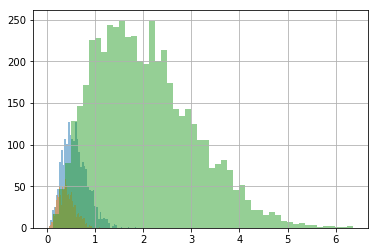

In [18]:
df.groupby(['elem'])['vel'].hist(bins=50, alpha=0.5)

elem
C     Axes(0.125,0.125;0.775x0.755)
CL    Axes(0.125,0.125;0.775x0.755)
H     Axes(0.125,0.125;0.775x0.755)
Name: vel, dtype: object

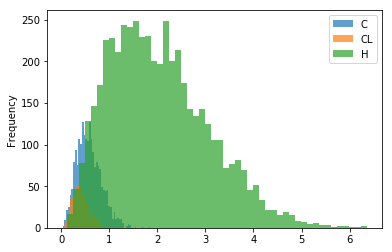

In [19]:
df.groupby(['elem'])['vel'].plot(kind='hist', bins=50, alpha=0.7, legend=True)

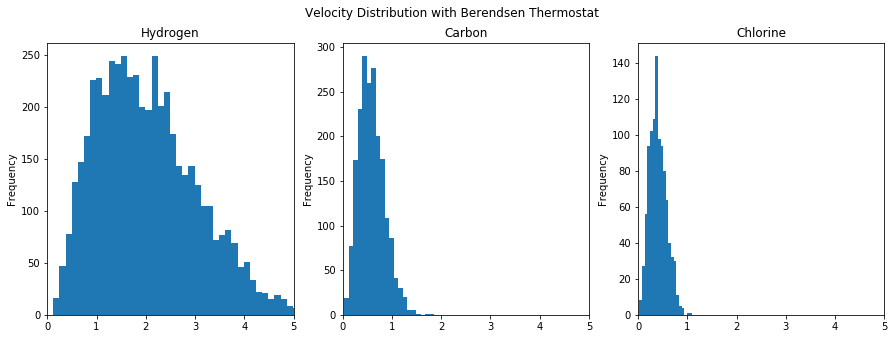

In [20]:
fig1 = plt.figure(1, figsize=(15,5), )
plt.suptitle('Velocity Distribution with Berendsen Thermostat')

plt.subplot(131)
plot_h = df[ df['elem'] == 'H'  ]['vel'].plot(kind='hist', bins=50, xlim=(0.,5.))
plot_h.set_title('Hydrogen')

plt.subplot(132)
plot_c = df[ df['elem'] == 'C'  ]['vel'].plot(kind='hist', bins=20, xlim=(0.,5.))
plot_c.set_title('Carbon')

plt.subplot(133)
plot_cl= df[ df['elem'] == 'CL' ]['vel'].plot(kind='hist', bins=20, xlim=(0.,5.))
plot_cl.set_title('Chlorine')


In [21]:
df_bussi = pd.read_table('nvt_bussi.gro', sep='\s+', skiprows=2, names=gro_header)
df_bussi['vel'] = (df_bussi.vx **2 + df_bussi.vy **2 + df_bussi.vz **2) **0.5

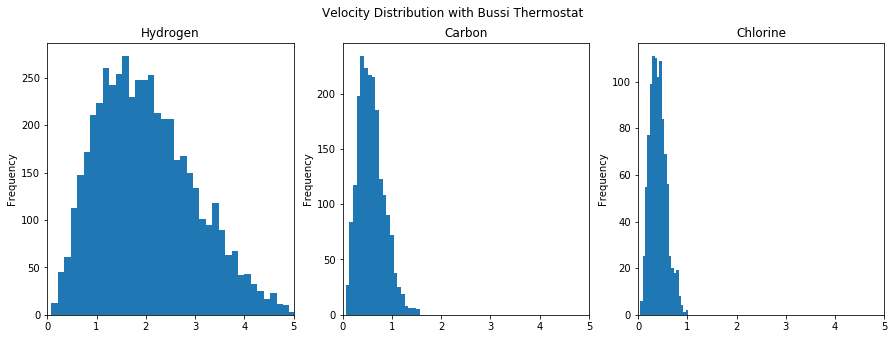

In [22]:
fig1 = plt.figure(1, figsize=(15,5), )
plt.suptitle('Velocity Distribution with Bussi Thermostat')

plt.subplot(131)
plot_h = df_bussi[ df_bussi['elem'] == 'H'  ]['vel'].plot(kind='hist', bins=50, xlim=(0.,5.))
plot_h.set_title('Hydrogen')

plt.subplot(132)
plot_c = df_bussi[ df_bussi['elem'] == 'C'  ]['vel'].plot(kind='hist', bins=20, xlim=(0.,5.))
plot_c.set_title('Carbon')

plt.subplot(133)
plot_cl= df_bussi[ df_bussi['elem'] == 'CL' ]['vel'].plot(kind='hist', bins=20, xlim=(0.,5.))
plot_cl.set_title('Chlorine')
